In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


top_followed = pd.read_csv("top_followed.csv") # source: https://socialblade.com/twitter/top/500/followers
headers = [top_followed['screen_name'][x] for x in range(20)]
headers.insert(0, 'sentiment')

CNN_class_data = pd.read_csv("CNN_class_data.csv", names=headers)
FoxNews_class_data = pd.read_csv("FoxNews_class_data.csv", names=headers)
MSNBC_class_data = pd.read_csv("MSNBC_class_data.csv", names=headers)
NPR_class_data = pd.read_csv("NPR_class_data.csv", names=headers)
cspan_class_data = pd.read_csv("cspan_class_data.csv", names=headers)

sentiment_data = [CNN_class_data, FoxNews_class_data, MSNBC_class_data, NPR_class_data, cspan_class_data]
data_order = ["CNN" , "FOX", "MSNBC" , "NPR" , "CSPAN"]


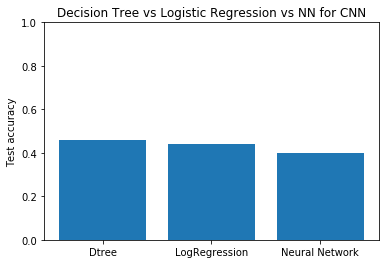

The Best classification method for CNN is Dtree with accuracy : 0.46
Best Hyperparams DTree : 3  LogReg : 0.01 


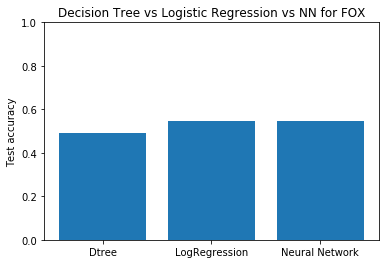

The Best classification method for FOX is LogRegression with accuracy : 0.545
Best Hyperparams DTree : 2  LogReg : 0.01 
Log Coefficients: 

[[-0.05861289 -0.25329463 -0.04298089 -0.05272262 -0.00188968 -0.03654574
  -0.05087092 -0.00648485 -0.17275189 -0.03406471 -0.04492245 -0.03409039
  -0.0505663  -0.1541216  -0.10040579 -0.06223707 -0.01714608 -0.03291147
   0.0045716  -0.02091572]
 [ 0.03378918  0.03325207 -0.03049935  0.0352113  -0.03521889 -0.04267327
  -0.05694544 -0.00486955  0.03073415 -0.02477917  0.03272827 -0.00465187
  -0.02930618  0.02379525  0.04014333 -0.02665843 -0.01357135 -0.03070238
  -0.03282446 -0.02270727]
 [-0.06447721 -0.1241036  -0.00521075 -0.04223949 -0.02132664  0.02215407
   0.03116422  0.00957973 -0.11798853  0.00053436 -0.05567124  0.01228179
   0.01819664 -0.11089709 -0.10543084  0.02087273  0.00167991  0.02483847
  -0.00219629 -0.00034097]]


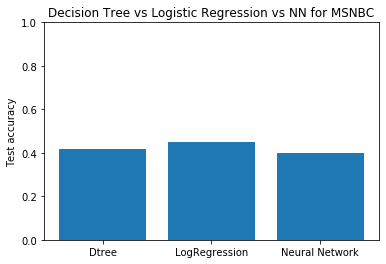

The Best classification method for MSNBC is LogRegression with accuracy : 0.451
Best Hyperparams DTree : 3  LogReg : 0.1 
Log Coefficients: 

[[-0.23109182 -0.27952522  0.06937418 -0.30716227 -0.16994551  0.37998525
  -0.11981406  0.01599722 -0.13138973  0.12303913 -0.06943064 -0.15195641
   0.02954033 -0.14636094 -0.10783003 -0.00545681 -0.00188024  0.03275915
  -0.15666186  0.3064623 ]
 [ 0.01705246  0.05372077 -0.20609031  0.04936417  0.04730801 -0.07646676
   0.11842726 -0.07495595 -0.06149686  0.01173791  0.22186632 -0.05809739
  -0.19412106  0.26223245  0.10794888 -0.15462548  0.1084528  -0.00894427
  -0.02498308 -0.08561343]
 [-0.06456874 -0.02694257  0.12316207  0.16440917  0.02953277 -0.23850438
  -0.08334751  0.05432616  0.07252433 -0.15648818 -0.23952044  0.19703764
   0.17124128 -0.21110663 -0.10112258  0.15935418 -0.06925735 -0.02681278
   0.07204921 -0.17428819]]


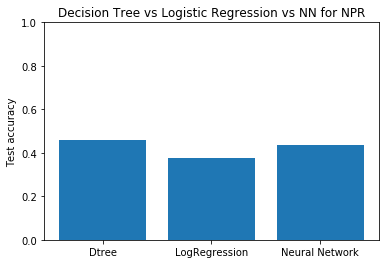

The Best classification method for NPR is Dtree with accuracy : 0.458
Best Hyperparams DTree : 2  LogReg : 0.4 


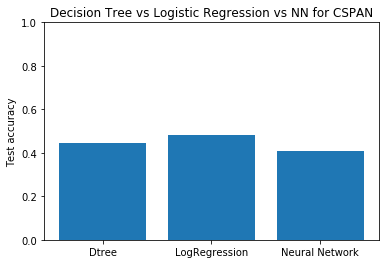

The Best classification method for CSPAN is LogRegression with accuracy : 0.481
Best Hyperparams DTree : 2  LogReg : 0.2 
Log Coefficients: 

[[-0.18791248 -0.4885345  -0.10010322 -0.17540854 -0.15899642 -0.27908488
  -0.30666005 -0.01073152 -0.13498887 -0.35272759 -0.2372383  -0.20661078
  -0.13592622 -0.25341261  0.03031101 -0.08214741 -0.1308299  -0.03837398
  -0.0385092  -0.20333064]
 [ 0.01595347 -0.11452668  0.12933405  0.20858629  0.09036176 -0.0940969
  -0.13427732 -0.10045499 -0.13412663  0.03280061  0.25173947  0.08795698
  -0.27077823  0.23759938  0.1379618  -0.07576677 -0.06070044 -0.14747682
  -0.10421592 -0.01368985]
 [-0.20496112  0.21289553 -0.16470877 -0.16424633 -0.06913787  0.22493139
   0.26940287  0.11283349  0.05675251  0.16248361 -0.18954006  0.00842258
   0.25931088 -0.19627277 -0.28341772  0.05901045  0.14173854  0.10259621
   0.0797113   0.04372448]]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import neural_network


best_test_accuracies = []
d_tree_accuracies = []
log_accuracies = []
nn_accuracies = []
for i, news_outlet in enumerate(sentiment_data):
    Y = pd.Series(news_outlet['sentiment'].values)
    X = news_outlet.drop(labels = 'sentiment' , axis = 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3 , train_size = .7 , random_state=1)
    
    #Decision Tree Classifier
    maxdepths = [1,2,3,4,5,6,7,8,9,10]
    validationAcc = np.zeros(len(maxdepths))
    testAcc = np.zeros(len(maxdepths))
    numFolds = 10
    
    #Finding the best hyperparams and calculating error of trees using cross validation
    index = 0
    for depth in maxdepths:
        clf = tree.DecisionTreeClassifier(max_depth = depth, random_state = 1)
        scores = cross_val_score(clf, X_train, Y_train, cv= numFolds)
        validationAcc[index] = np.mean(scores)
     
        clf = clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        
        testAcc[index] = accuracy_score(Y_test, Y_pred)
        
        bestHyperparam = np.argmax(validationAcc)
        index += 1
        
    best_test_accuracies.append(testAcc[bestHyperparam])
    

    params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    logistic_acc = np.zeros(len(params))
    coef_log = []
    index = 0
    #linear regression classifier
    for value in params:
        clf = linear_model.LogisticRegression(C=value, random_state=1)
        
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        
        logistic_acc[index] = (accuracy_score(Y_test, Y_pred))
        coef_log.append(clf.coef_)
        best_log_param = np.argmax(logistic_acc)

        index += 1
    best_coef_logs = coef_log[best_log_param]


    #neural network classifier
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', 
                                  max_iter=2000, random_state=1 , early_stopping=True)
    clf = clf.fit(X_train, Y_train.ravel())
    Y_pred = clf.predict(X_test)
    nn_acc = accuracy_score(Y_test, Y_pred)
      
    #Compare accuracy of prediction models
    methods = ['Dtree', 'LogRegression', 'Neural Network']
    acc = [testAcc[bestHyperparam], logistic_acc[best_log_param], nn_acc]

    d_tree_accuracies.append(testAcc[bestHyperparam])
    log_accuracies.append(logistic_acc[best_log_param])
    nn_accuracies.append(nn_acc)
    
    plt.title(f'Decision Tree vs Logistic Regression vs NN for {data_order[i]}')
    plt.bar([1.5,2.5, 3.5],acc)
    plt.xticks([1.5,2.5, 3.5], methods)
    plt.ylabel('Test accuracy')
    plt.ylim([0.0,1])
    plt.show()
    print(f"The Best classification method for {data_order[i]} is {methods[acc.index(max(acc))]} with accuracy : {round(acc[acc.index(max(acc))] , 3)}")
    print(f"Best Hyperparams DTree : {maxdepths[bestHyperparam]}  LogReg : {params[best_log_param]} ")
    if methods[acc.index(max(acc))] == "LogRegression":
        print("Log Coefficients: \n")
        print(best_coef_logs)

In [23]:
#Entire Data
all_data = pd.concat(sentiment_data)
Y = pd.Series(all_data['sentiment'].values)
X = all_data.drop(labels = 'sentiment' , axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3 , train_size = .7 , random_state=1)

params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1 , 5 , 10 , 15 , 20, 50 ,100]
logistic_acc = np.zeros(len(params))
coef_log = []
index = 0

#regression classifier
for value in params:
    clf = linear_model.LogisticRegression(C=value, random_state=1)
    
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    
    logistic_acc[index] = (accuracy_score(Y_test, Y_pred))
    coef_log.append(clf.coef_)
    best_log_param = np.argmax(logistic_acc)

    index += 1
best_coef_logs = coef_log[best_log_param]

print("Logistic Regression Accuracy for entire data: " , logistic_acc[best_log_param])
print("Coefficients : \n" , clf.coef_)

Logistic Regression Accuracy for entire data:  0.4723127035830619
Coefficients : 
 [[-0.1172817  -0.07050686 -0.01237336 -0.27979007 -0.12626708  0.42716885
   0.11362612 -0.82903355 -0.00734296 -0.1087402  -0.043493   -0.36589857
  -0.13097509  0.07854154 -0.06058638 -0.16650634  0.24370735  0.11697884
   0.07977414  0.2482356 ]
 [ 0.07265504  0.03474339 -0.11441803 -0.08240758 -0.07925015  0.02927692
  -0.27390496  0.11171232  0.08224328  0.045707    0.1539634  -0.11357609
  -0.01068506  0.21865103  0.07307168 -0.17493591 -0.25350666  0.00332249
   0.07241581  0.18843577]
 [-0.01308698  0.0048542   0.12655648  0.2256057   0.14995003 -0.27175646
   0.2188424   0.23041903 -0.08401802  0.01363331 -0.13193031  0.29622735
   0.07760796 -0.27085727 -0.05159312  0.27089531  0.13826122 -0.0636429
  -0.1182274  -0.34574565]]


In [19]:
maxdepths = [1,2,3,4,5,6,7,8,9,10]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
numFolds = 10

#Finding the best hyperparams and calculating error of trees using cross validation
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth = depth, random_state = 1)
    scores = cross_val_score(clf, X_train, Y_train, cv= numFolds)
    validationAcc[index] = np.mean(scores)

    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    testAcc[index] = accuracy_score(Y_test, Y_pred)

    bestHyperparam = np.argmax(validationAcc)
    index += 1

best_test_accuracies.append(testAcc[bestHyperparam])
print("Decision Tree Accuracy for entire data: " , testAcc[bestHyperparam])

Decision Tree Accuracy for entire data:  0.4444444444444444


In [21]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', 
                              max_iter=2000, random_state=1 , early_stopping=True)
clf = clf.fit(X_train, Y_train.ravel())
Y_pred = clf.predict(X_test)
nn_acc = accuracy_score(Y_test, Y_pred)
print("Neural Net Accuracy for entire data: " , nn_acc)

Neural Net Accuracy for entire data:  0.4074074074074074


In [15]:
#Average accuracies for data-subsets
print(f"Average Decision Tree Accuracy {sum(d_tree_accuracies)/len(d_tree_accuracies)}")
print(f"Average Logistic Regression Accuracy {sum(log_accuracies)/len(log_accuracies)}")
print(f"Average Neural Network Accuracy {sum(nn_accuracies)/len(nn_accuracies)}")

Average Decision Tree Accuracy 0.4541385728332631
Average Logistic Regression Accuracy 0.4589165213774792
Average Neural Network Accuracy 0.4369678353150503
